In [1]:
import pandas as pd
import h5py
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from pylab import rcParams
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import FactorAnalysis

from sklearn.cluster import DBSCAN
 
rcParams['figure.figsize'] =20,10
rcParams['legend.fontsize'] = 20
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 20}
plt.rc('font', **font)

In [2]:
# constants  #
#------------#
HDF5_dir = "E:\\MessdatenStoeckach\\"
resampled_dir = r'E:\resampled_phasevise'
dates = os.listdir(HDF5_dir)
phases = ["1","2","3"]

In [285]:
def levels_dbmyA(Aout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    a = np.array(Aout.values.tolist())
    Aout = pd.DataFrame(np.where(a < 1e-6, 1e-6, a).tolist())

    Aout = Aout/1e-6
    Aout = np.log10(Aout)
    Aout = Aout*20
    return Aout

In [288]:
def levels_dbmyV(Vout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    Vout = Vout*230
    
    a = np.array(Vout.values.tolist())
    Vout = pd.DataFrame(np.where(a < 1e-6, 1e-6, a).tolist())
    
    Vout = Vout/1e-6
    Vout = np.log10(Vout)
    Vout = Vout*20
    return Vout

In [5]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

In [8]:
datelist = ["2017-04-05"]

In [53]:
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [54]:
sh_i_all

0         1         2         3         4         5         6     \
0    0.003805  0.049103  0.005165  0.029892  0.002405  0.054077  0.002605   
1    0.003839  0.049591  0.005104  0.028168  0.002522  0.050232  0.002598   
2    0.003700  0.051453  0.005302  0.029251  0.002676  0.047150  0.002573   
3    0.003613  0.050476  0.005486  0.030533  0.002661  0.050232  0.002357   
4    0.003929  0.051331  0.006367  0.030045  0.002937  0.047211  0.002405   
..        ...       ...       ...       ...       ...       ...       ...   
427  0.002413  0.039673  0.004532  0.028702  0.002182  0.031891  0.001783   
428  0.002560  0.038818  0.004810  0.028763  0.002214  0.033203  0.001912   
429  0.002562  0.040375  0.004620  0.029572  0.002325  0.032593  0.002020   
430  0.002625  0.038483  0.004944  0.027542  0.002325  0.031342  0.002356   
431  0.002661  0.038177  0.005405  0.027130  0.002148  0.029190  0.002340   

         7         8         9     ...      2950      2951      2952  \
0    0.036804  0.002506  0.033905  ...  0.000012  0.000012  0.000007   
1    0.035400  0.002480  0.036530  ...  0.000009  0.000012  0.000011   
2    0.033142  0.002375  0.036011  ...  0.000010  0.000012  0.000012   
3    0.034088  0.002447  0.033905  ...  0.000010  0.000008  0.000014   
4    0.030670  0.002481  0.037170  ...  0.000006  0.000012  0.000013   
..        ...       ...       ...  ...       ...       ...       ...   
427  0.028992  0.003508  0.043457  ...  0.000007  0.000006  0.000007   
428  0.029709  0.003361  0.043274  ...  0.000005  0.000006  0.000005   
429  0.028244  0.003099  0.042694  ...  0.000007  0.000005  0.000003   
430  0.029556  0.002758  0.044342  ...  0.000006  0.000008  0.000009   
431  0.027908  0.002911  0.045166  ...  0.000005  0.000011  0.000009   

         2953      2954      2955      2956      2957      2958      2959  
0    0.000008  0.000010  0.000025  0.000038  0.000016  0.000012  0.000010  
1    0.000038  0.000024  0.000033  0.000011  0.000014  0.000012  0.000011  
2    0.000021  0.000030  0.000036  0.000010  0.000015  0.000013  0.000011  
3    0.000019  0.000049  0.000024  0.000008  0.000013  0.000013  0.000011  
4    0.000033  0.000051  0.000018  0.000011  0.000013  0.000019  0.000009  
..        ...       ...       ...       ...       ...       ...       ...  
427  0.000010  0.000015  0.000012  0.000009  0.000010  0.000010  0.000007  
428  0.000011  0.000015  0.000007  0.000005  0.000012  0.000007  0.000004  
429  0.000005  0.000009  0.000006  0.000016  0.000005  0.000008  0.000005  
430  0.000010  0.000008  0.000009  0.000005  0.000014  0.000008  0.000006  
431  0.000008  0.000008  0.000008  0.000007  0.000008  0.000009  0.000007  

[432 rows x 2960 columns]

In [55]:
model = PCA(2)

In [56]:
sh_i_all = sh_i_all.dropna()

In [57]:
trans = model.fit_transform(sh_i_all)

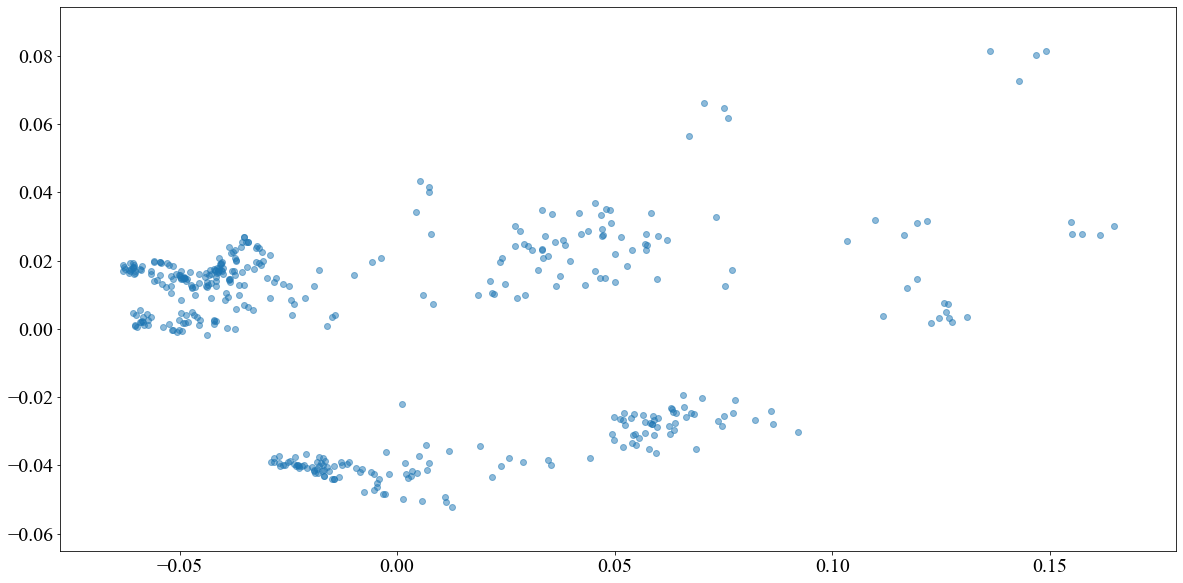

In [58]:
plt.scatter(trans[:,0], trans[:,1], alpha=0.5)
plt.show()

In [59]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(trans)

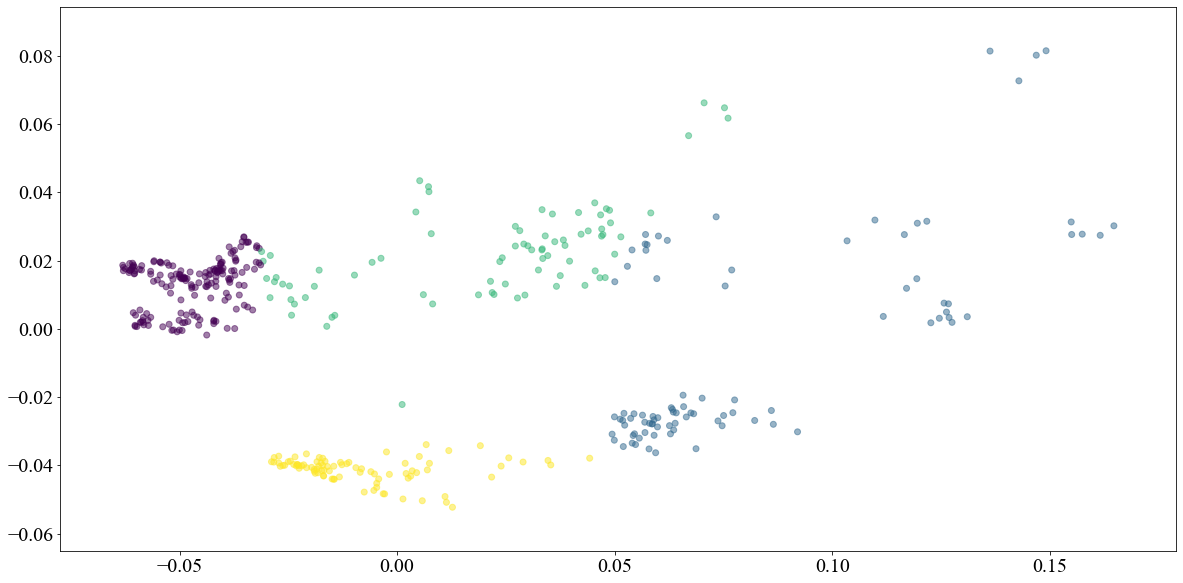

In [60]:
plt.scatter(trans[:,0], trans[:,1], c=clustering.labels_, alpha=0.5)
plt.show()

In [61]:
colorList = list()

In [62]:
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')

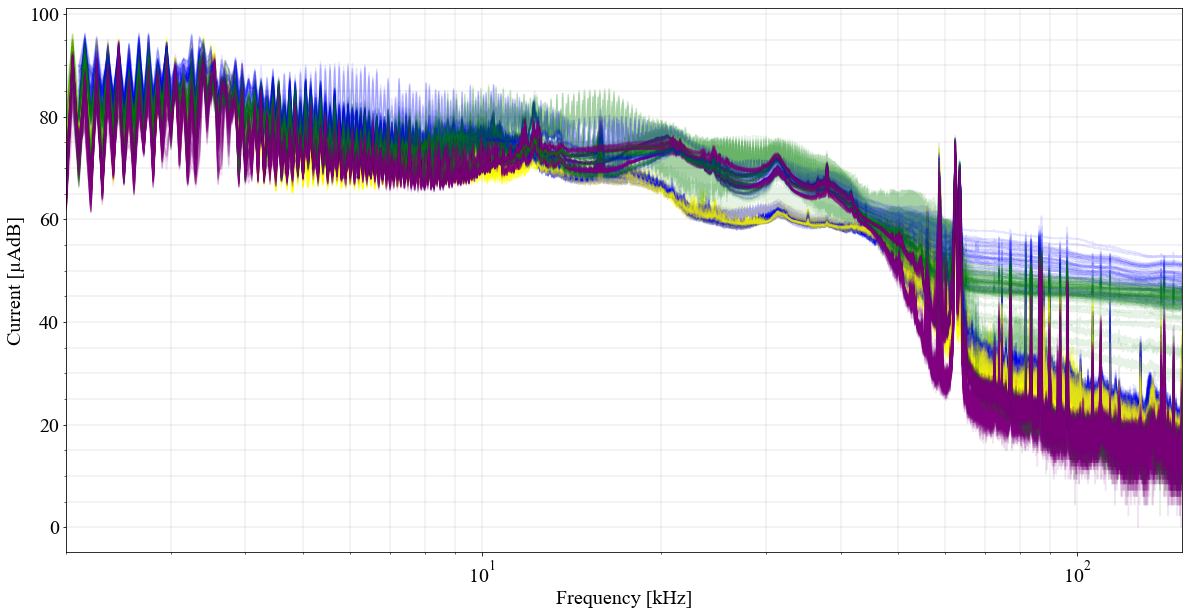

In [64]:
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.1)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

In [65]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(sh_i_all)

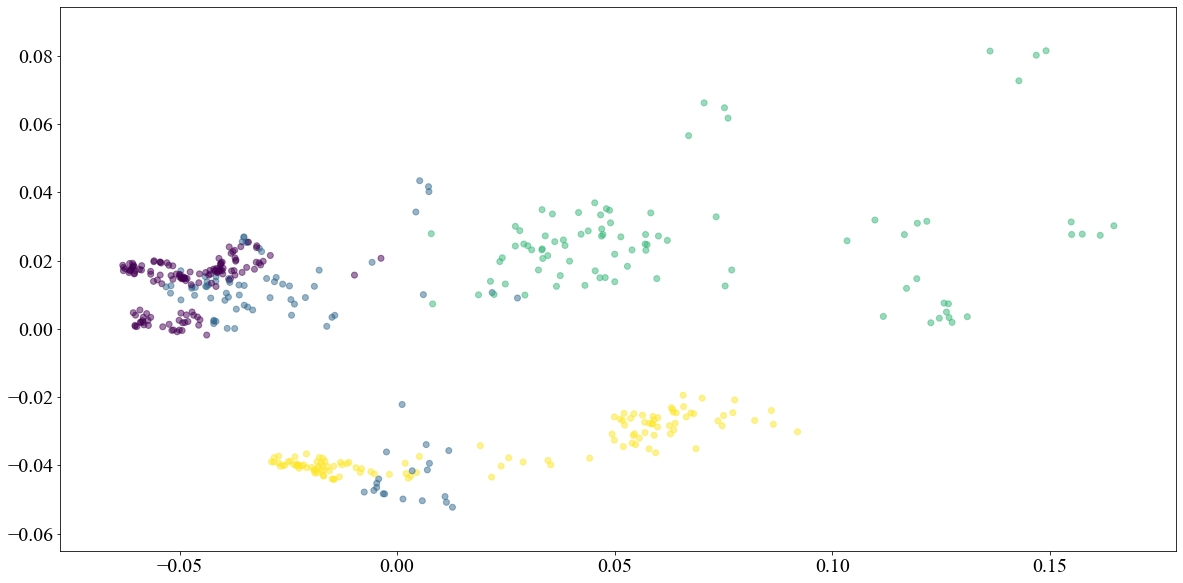

In [66]:
plt.scatter(trans[:,0], trans[:,1], c=clustering.labels_, alpha=0.5)
plt.show()

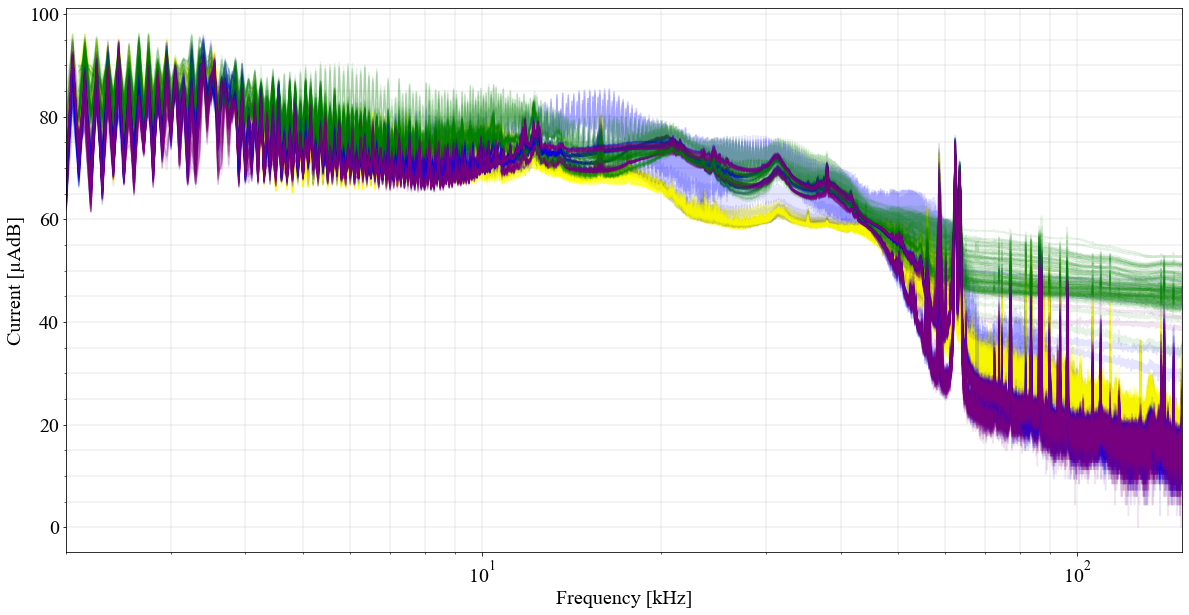

In [67]:
colorList = list()
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.1)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

In [68]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07"]
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [70]:
model = PCA(2)
sh_i_all = sh_i_all.dropna()
trans = model.fit_transform(sh_i_all)

In [75]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(trans)

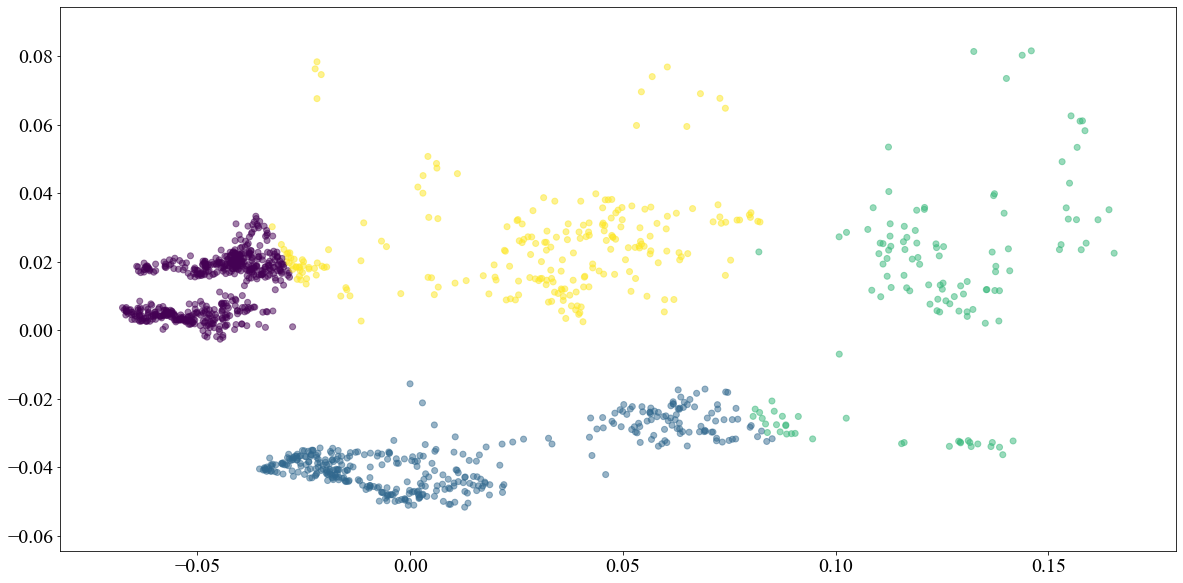

In [76]:
plt.scatter(trans[:,0], trans[:,1], c=clustering.labels_, alpha=0.5)
plt.show()

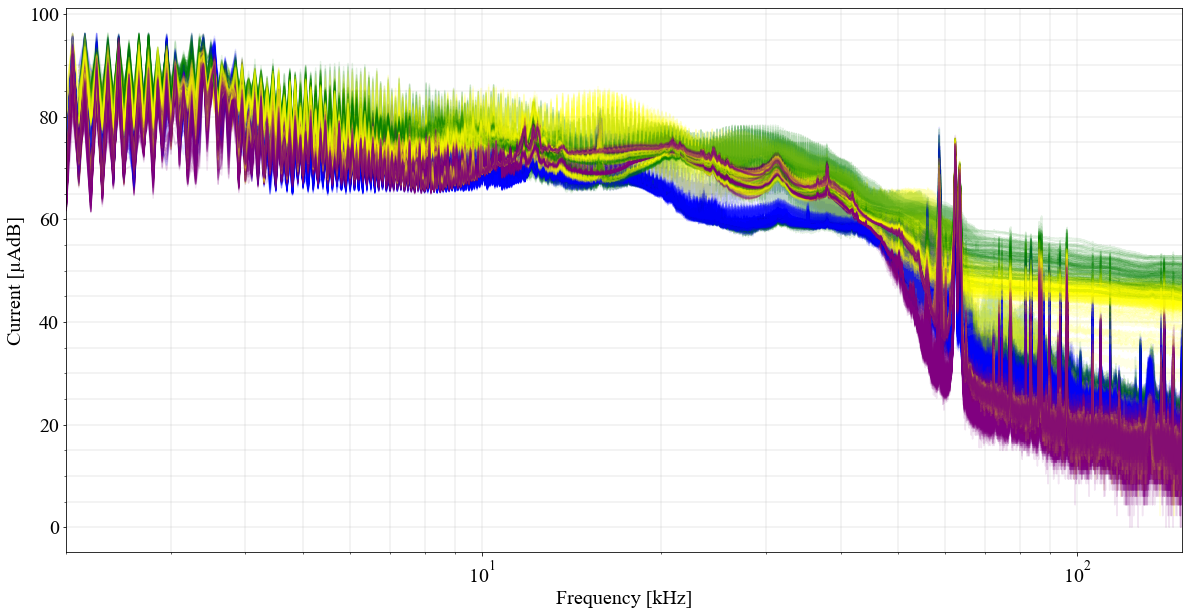

In [77]:
colorList = list()
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.1)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

In [78]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07","2017-04-08","2017-04-09","2017-04-10","2017-04-11","2017-04-12"]
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [79]:
model = PCA(2)
sh_i_all = sh_i_all.dropna()
trans = model.fit_transform(sh_i_all)

In [91]:
clustering = KMeans(n_clusters=5, random_state=0).fit(trans)

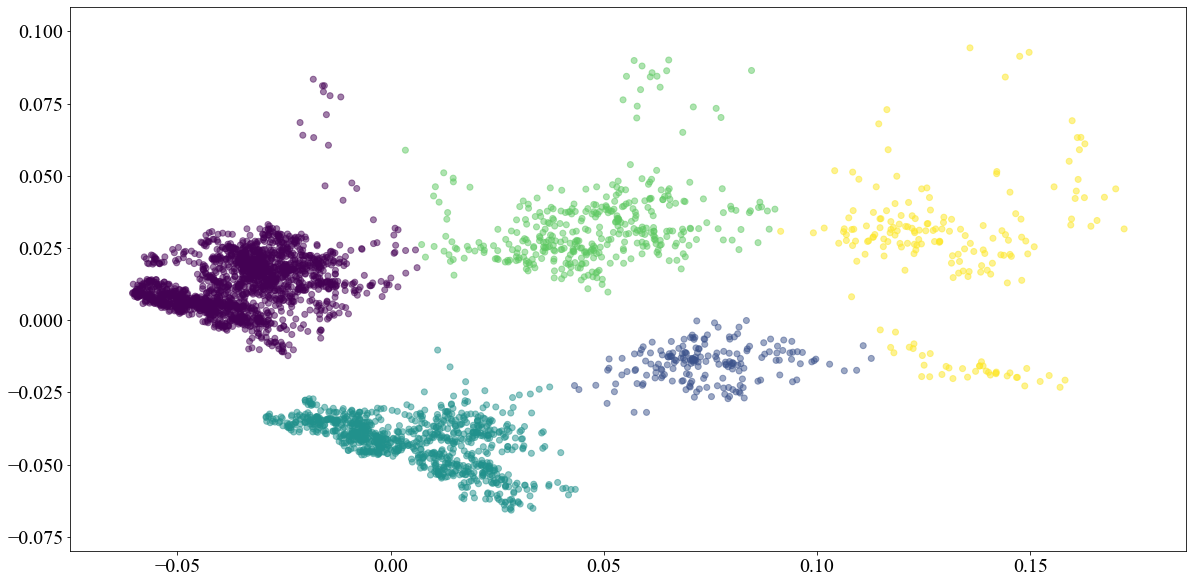

In [92]:
plt.scatter(trans[:,0], trans[:,1], c=clustering.labels_, alpha=0.5)
plt.show()

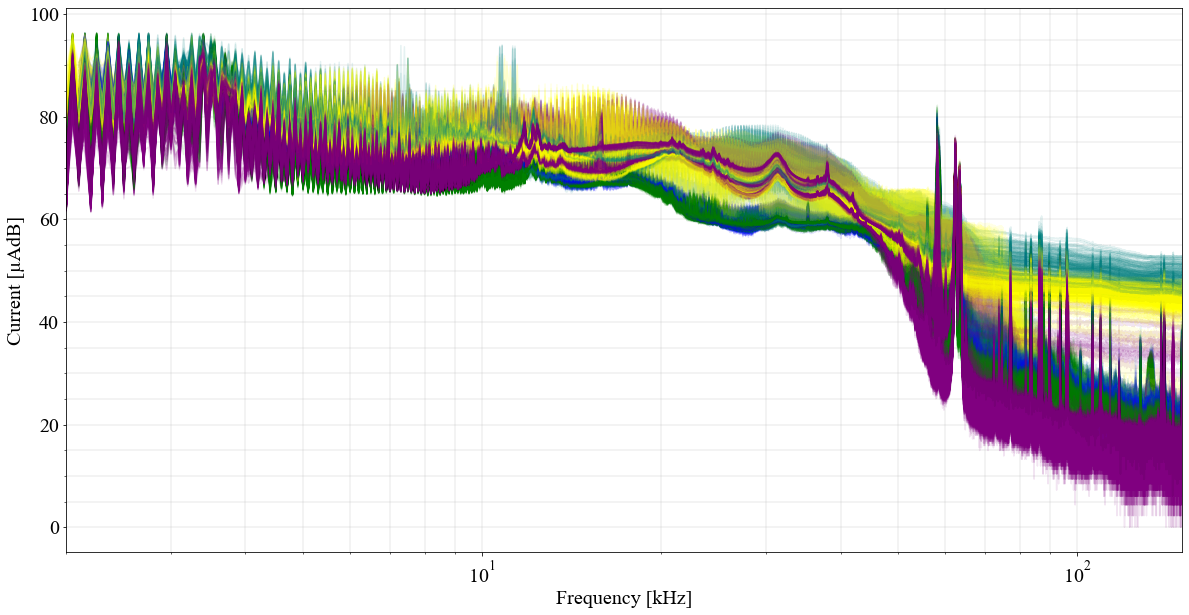

In [93]:
colorList = list()
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')
    if i == 4:
        colorList.append('teal')
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.1)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

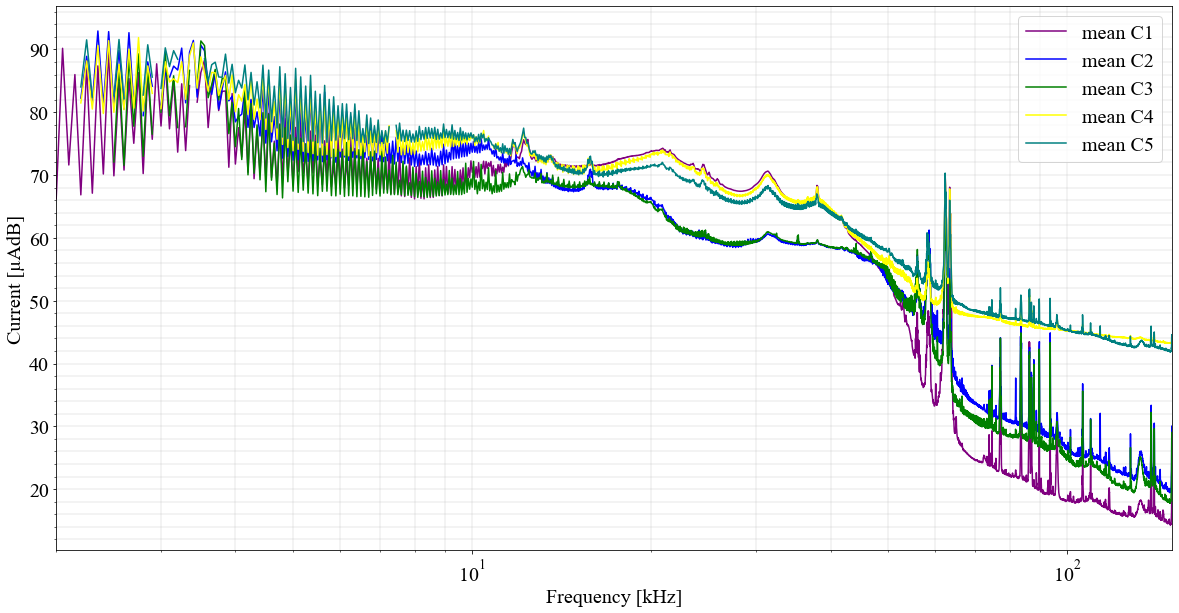

In [115]:
sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()

ax.plot(x, sh_i_db[clustering.labels_ == 0].astype('float32').mean(), c='purple', label="mean C1")
ax.plot(x, sh_i_db[clustering.labels_ == 1].astype('float32').mean(), c='blue', label="mean C2")
ax.plot(x, sh_i_db[clustering.labels_ == 2].astype('float32').mean(), c='green', label="mean C3")
ax.plot(x, sh_i_db[clustering.labels_ == 3].astype('float32').mean(), c='yellow', label="mean C4")
ax.plot(x, sh_i_db[clustering.labels_ == 4].astype('float32').mean(), c='teal', label="mean C5")



ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')
ax.legend()

In [145]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07","2017-04-08","2017-04-09","2017-04-10","2017-04-11","2017-04-12", "2017-03-03","2017-04-04","2017-05-05","2017-06-06","2017-07-07"]
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [146]:
model = PCA(2)
sh_i_all = sh_i_all.dropna()
trans_i = model.fit_transform(sh_i_all)

In [147]:
clustering_i = KMeans(n_clusters=5, random_state=0).fit(trans_i)

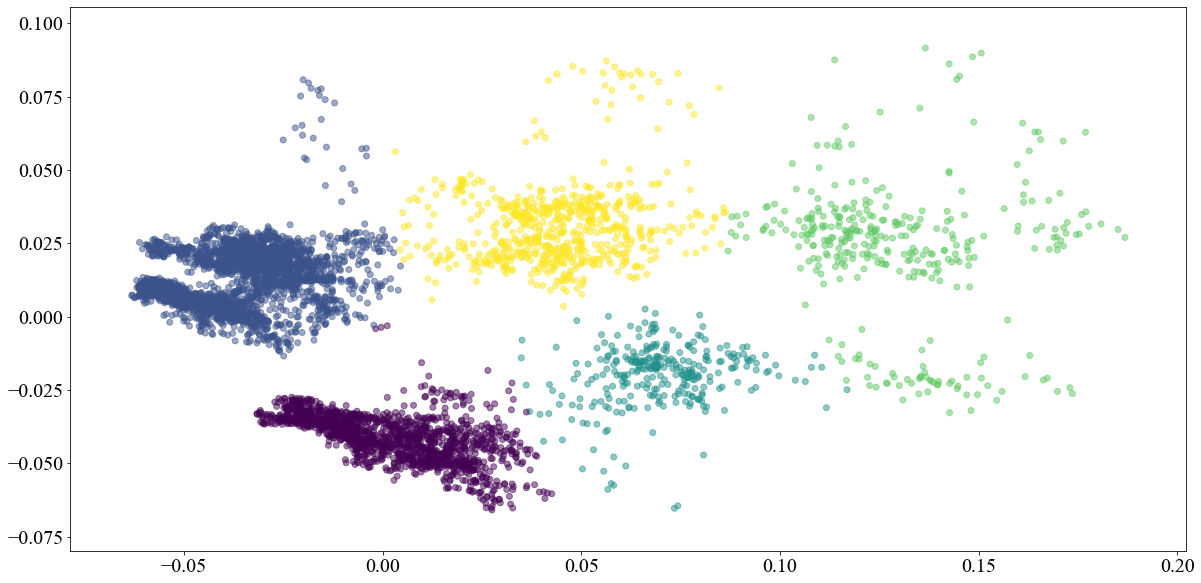

In [148]:
plt.scatter(trans_i[:,0], trans_i[:,1], c=clustering_i.labels_, alpha=0.5)
plt.show()

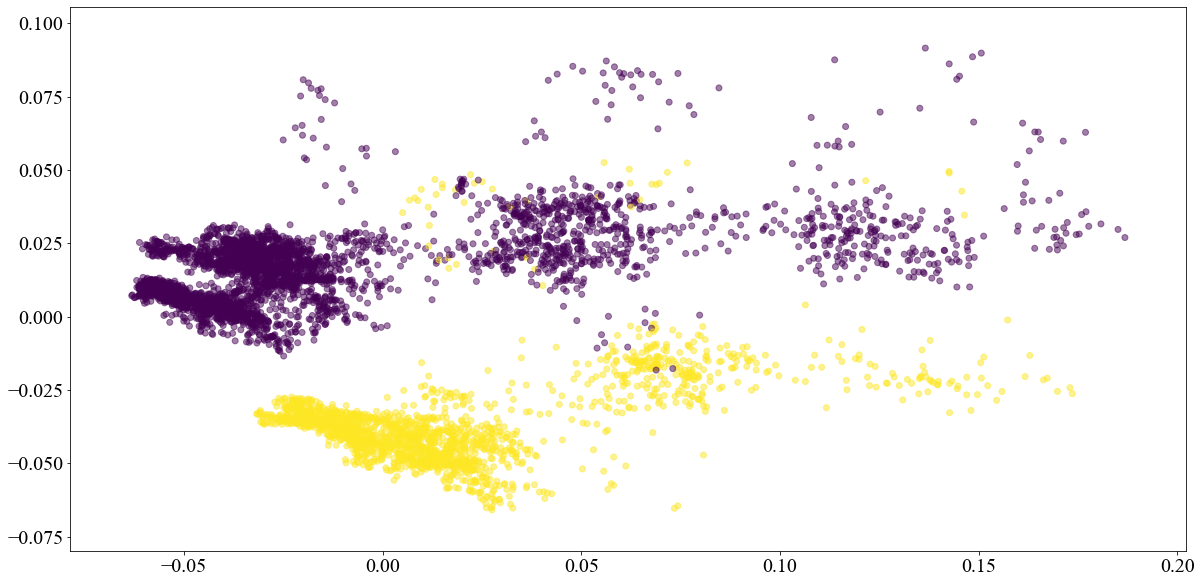

In [155]:
plt.scatter(trans_i[:,0], trans_i[:,1], c=clustering_u.labels_, alpha=0.5)
plt.show()

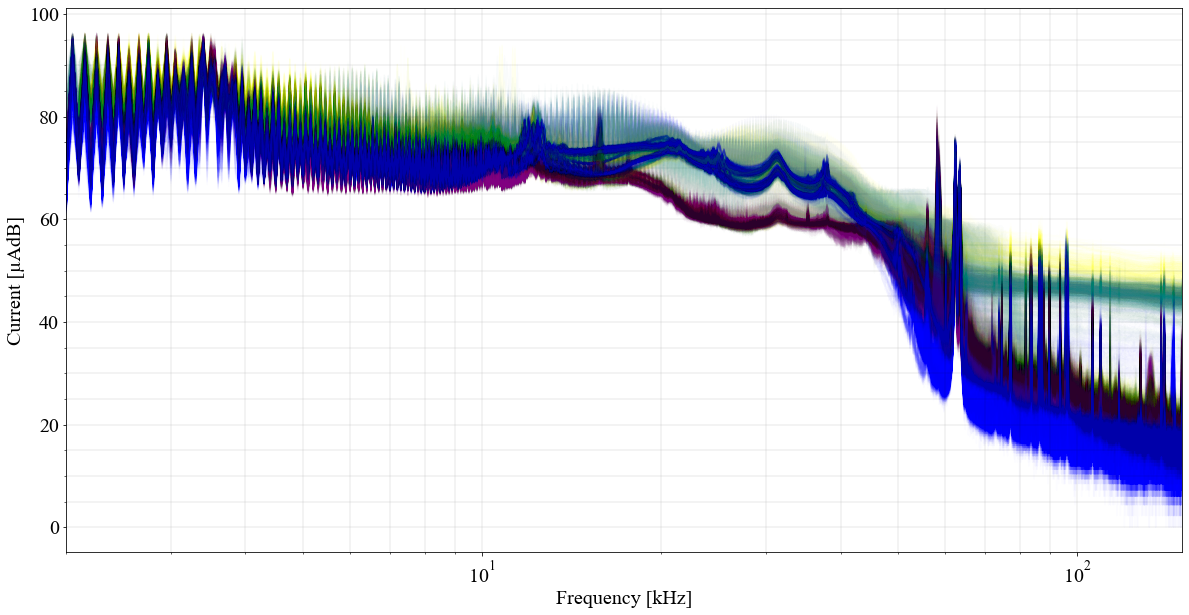

In [120]:
colorList = list()
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')
    if i == 4:
        colorList.append('teal')
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.01)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

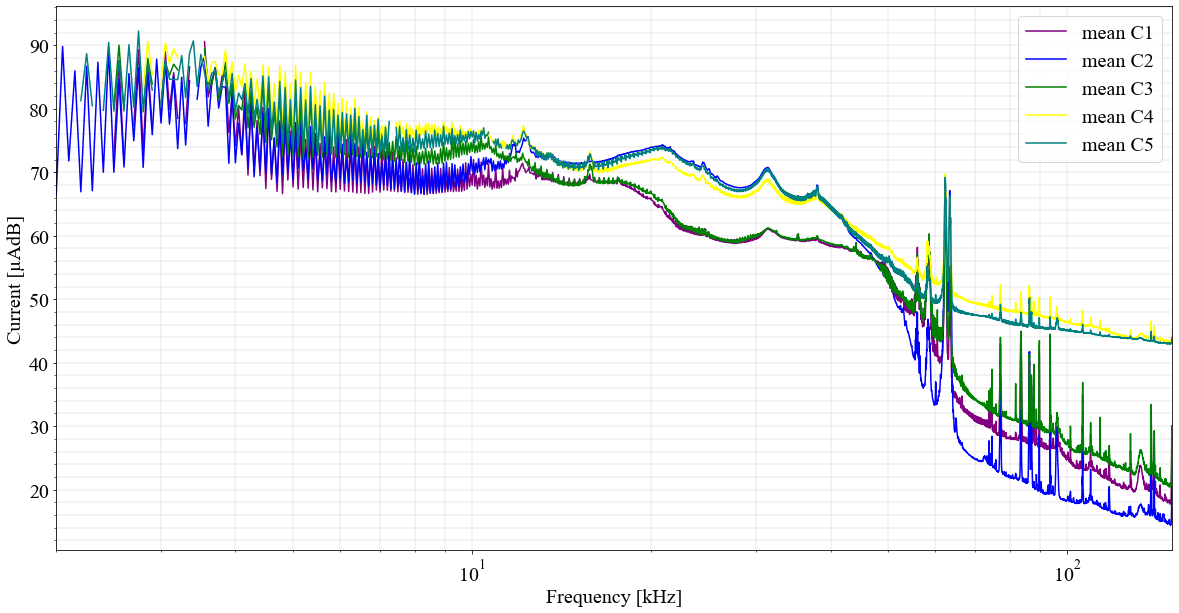

In [121]:
sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()

ax.plot(x, sh_i_db[clustering.labels_ == 0].astype('float32').mean(), c='purple', label="mean C1")
ax.plot(x, sh_i_db[clustering.labels_ == 1].astype('float32').mean(), c='blue', label="mean C2")
ax.plot(x, sh_i_db[clustering.labels_ == 2].astype('float32').mean(), c='green', label="mean C3")
ax.plot(x, sh_i_db[clustering.labels_ == 3].astype('float32').mean(), c='yellow', label="mean C4")
ax.plot(x, sh_i_db[clustering.labels_ == 4].astype('float32').mean(), c='teal', label="mean C5")



ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')
ax.legend()

In [150]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07","2017-04-08","2017-04-09","2017-04-10","2017-04-11","2017-04-12", "2017-03-03","2017-04-04","2017-05-05","2017-06-06","2017-07-07"]
sh_u_all = pd.DataFrame().astype('float32')
#sh_i_all = pd.DataFrame().astype('float32')
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled_phasevise\\u\\" + date + "_harmonics10min_u_mean_p1.p"), ignore_index=True)
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled_phasevise\\u\\" + date + "_harmonics10min_u_mean_p2.p"), ignore_index=True)
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled_phasevise\\u\\" + date + "_harmonics10min_u_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [151]:
model = PCA(2)
sh_u_all = sh_u_all.dropna()
trans_u = model.fit_transform(sh_u_all)

In [152]:
clustering_u = KMeans(n_clusters=2, random_state=0).fit(trans_u)

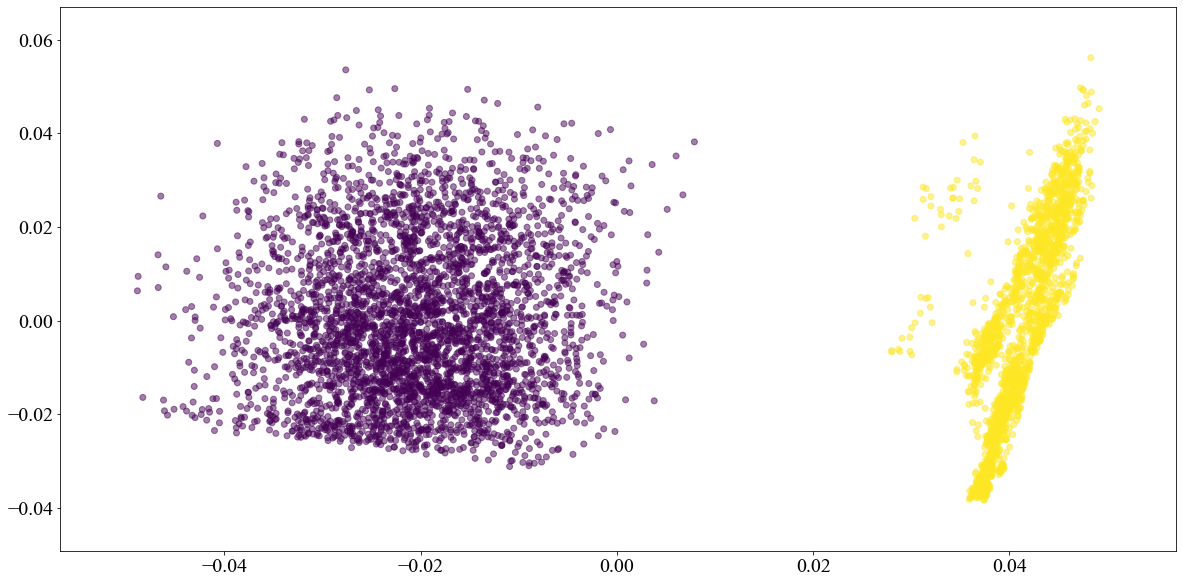

In [153]:
plt.scatter(trans_u[:,0], trans_u[:,1], c=clustering_u.labels_, alpha=0.5)
plt.show()

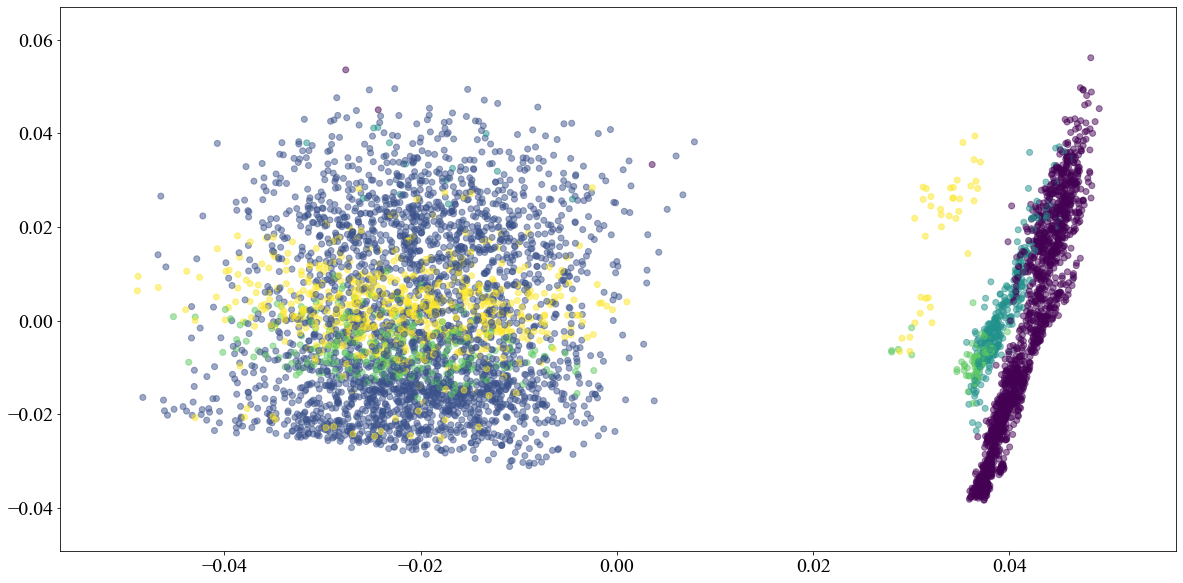

In [154]:
plt.scatter(trans_u[:,0], trans_u[:,1], c=clustering_i.labels_, alpha=0.5)
plt.show()

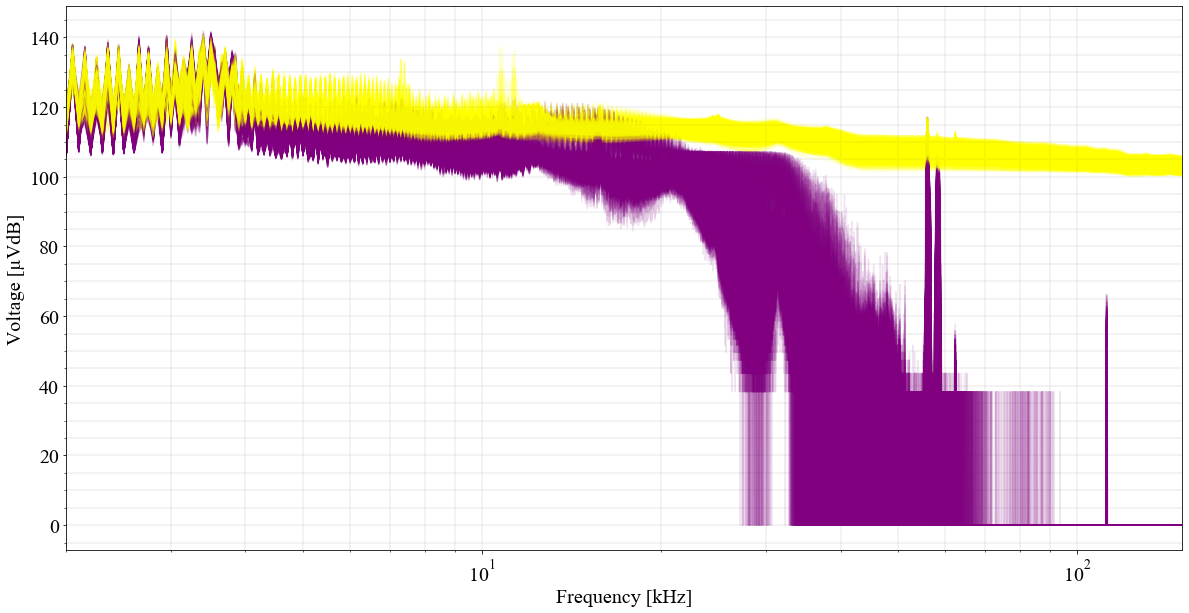

In [157]:
colorList = list()
for i in clustering_u.labels_:
    if i == 1:
        colorList.append('purple')
    if i == 0:
        colorList.append('yellow')
x = generateXAxisData()/1000

sh_u_db = levels_dbmyV(sh_u_all.astype('float32'))

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_u_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.1)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage [µVdB]')
ax.set_xscale('log')

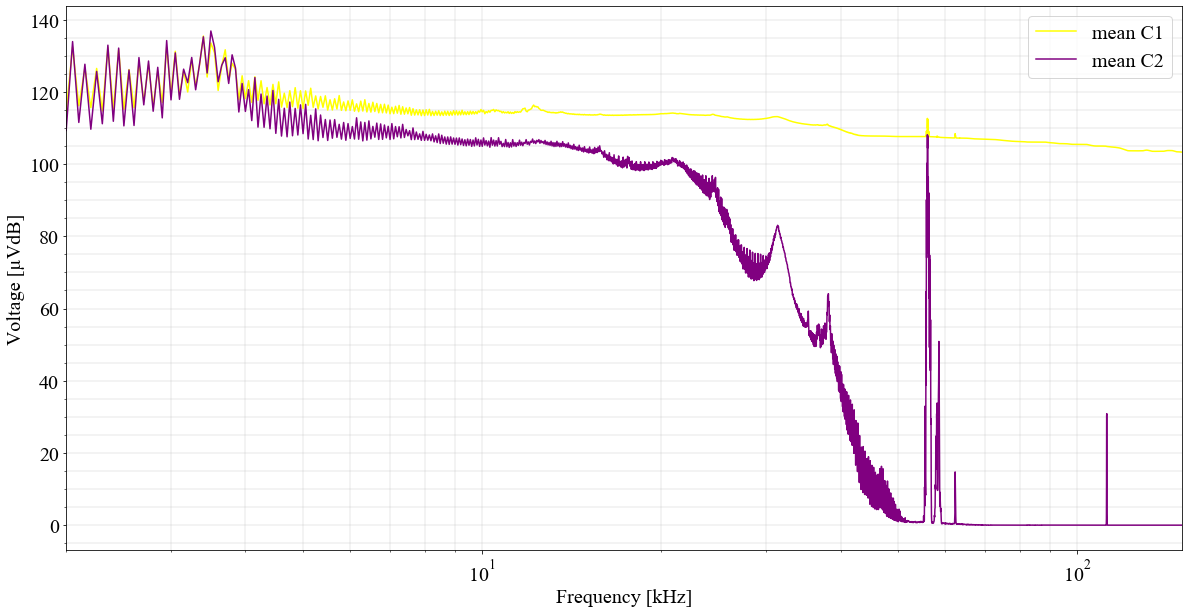

In [174]:
sh_u_db = levels_dbmyV(sh_u_all.astype('float32'))

fig, ax = plt.subplots()

ax.plot(x, sh_u_db[clustering_u.labels_ == 0].astype('float32').mean(), c='yellow', label="mean C1")
ax.plot(x, sh_u_db[clustering_u.labels_ == 1].astype('float32').mean(), c='purple', label="mean C2")


ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage [µVdB]')
ax.set_xscale('log')
ax.legend()

In [160]:
allData = pd.concat([sh_u_all, sh_i_all], axis=1)

In [162]:
scaler = StandardScaler()

In [163]:
allData = scaler.fit_transform(allData)

In [167]:
model = PCA(2)
trans_all = model.fit_transform(allData)

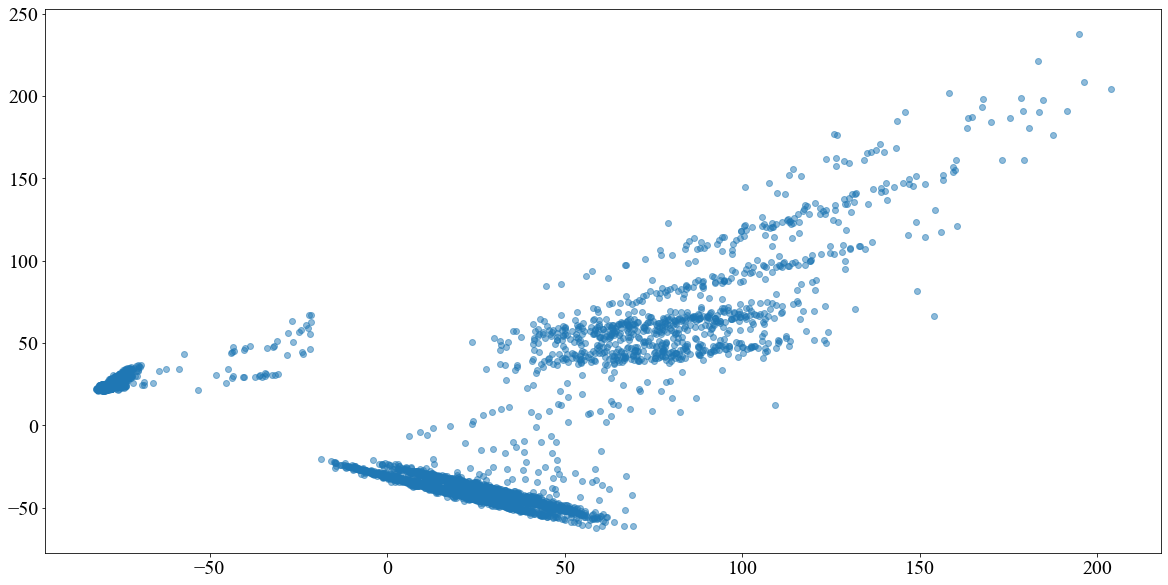

In [173]:
plt.scatter(trans_all[:,0], trans_all[:,1], alpha=0.5)
plt.show()

In [181]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07","2017-04-08","2017-04-09","2017-04-10","2017-04-11","2017-04-12", "2017-03-03","2017-04-04","2017-05-05","2017-06-06","2017-07-07","2017-08-08","2017-09-09","2017-10-10","2017-11-11","2017-12-12"]
#sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
#sh_u_outliers_all = pd.DataFrame()
#sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [176]:
model = PCA(2)
sh_i_all = sh_i_all.dropna()
trans_i = model.fit_transform(sh_i_all)

In [177]:
clustering_i = KMeans(n_clusters=5, random_state=0).fit(trans_i)

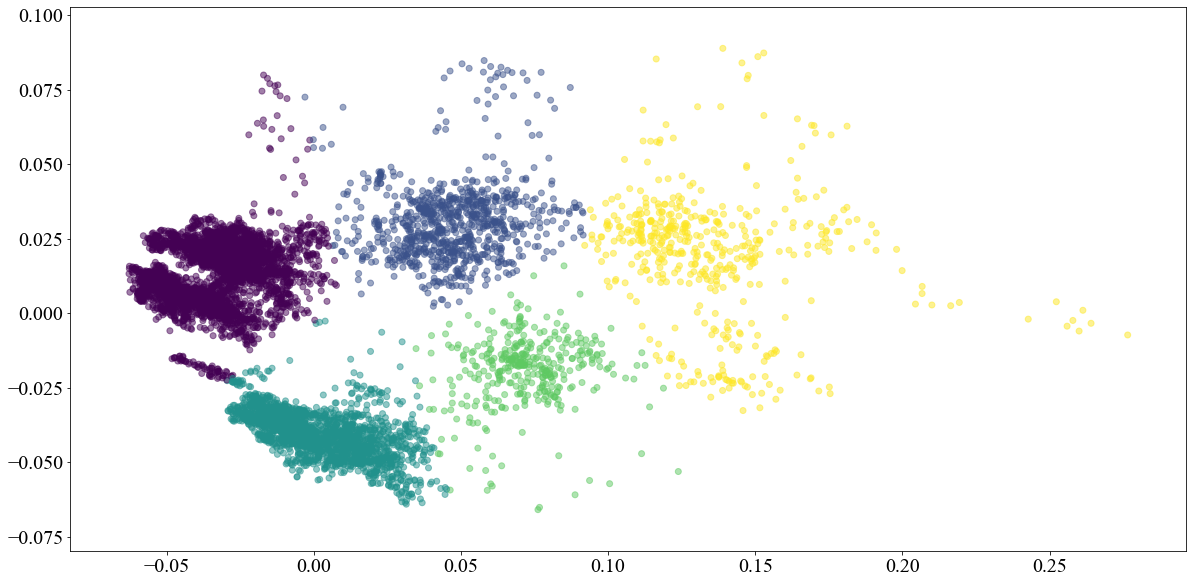

In [178]:
plt.scatter(trans_i[:,0], trans_i[:,1], c=clustering_i.labels_, alpha=0.5)
plt.show()

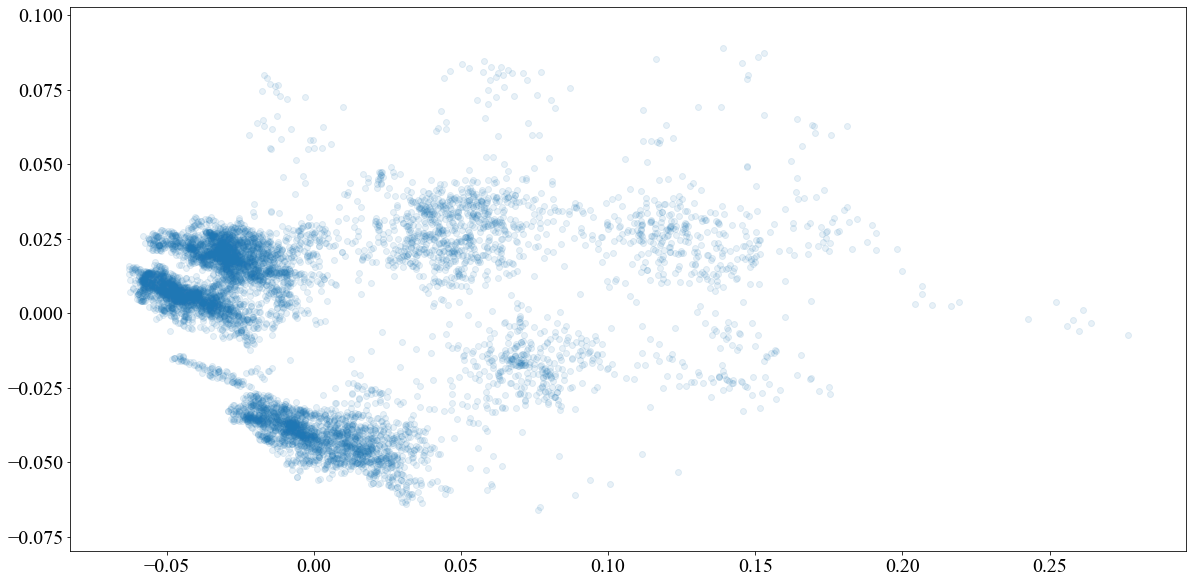

In [182]:
model = PCA(2)
sh_i_all = sh_i_all.dropna()
#scaler = StandardScaler()
#sh_i_all = scaler.fit_transform(sh_i_all)
trans_i = model.fit_transform(sh_i_all)
plt.scatter(trans_i[:,0], trans_i[:,1], alpha=0.1)
plt.show()

In [286]:
sh_i_db = levels_dbmyA(sh_i_all)

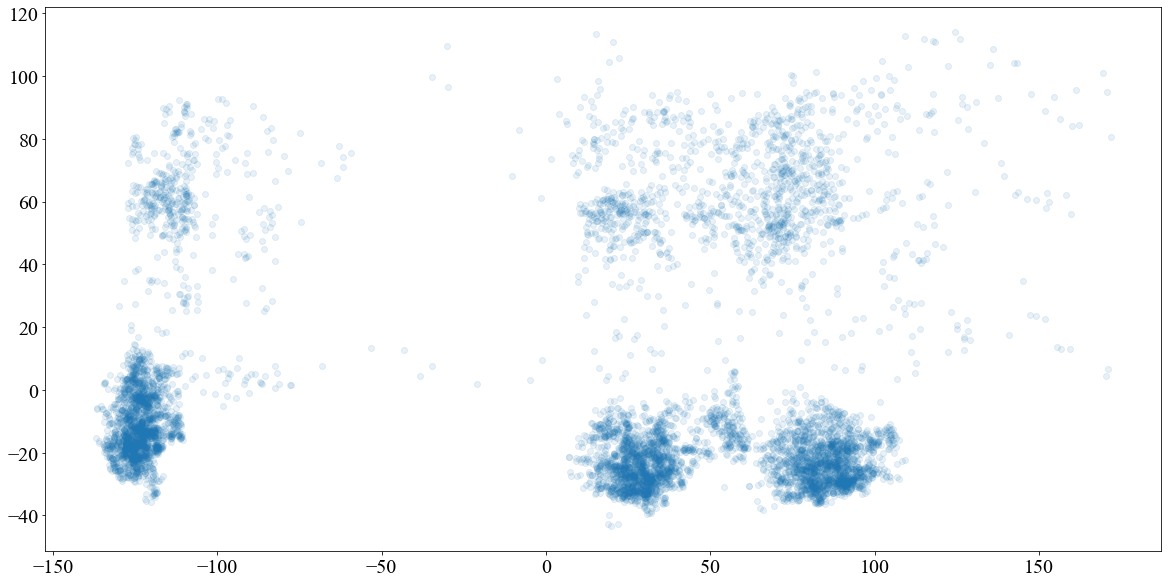

In [287]:
model = PCA(2)
trans_i_db = model.fit_transform(sh_i_db)
plt.scatter(trans_i_db[:,0], trans_i_db[:,1], alpha=0.1)
plt.show()

In [289]:
clustering_i_db = KMeans(n_clusters=5, random_state=0).fit(trans_i_db)

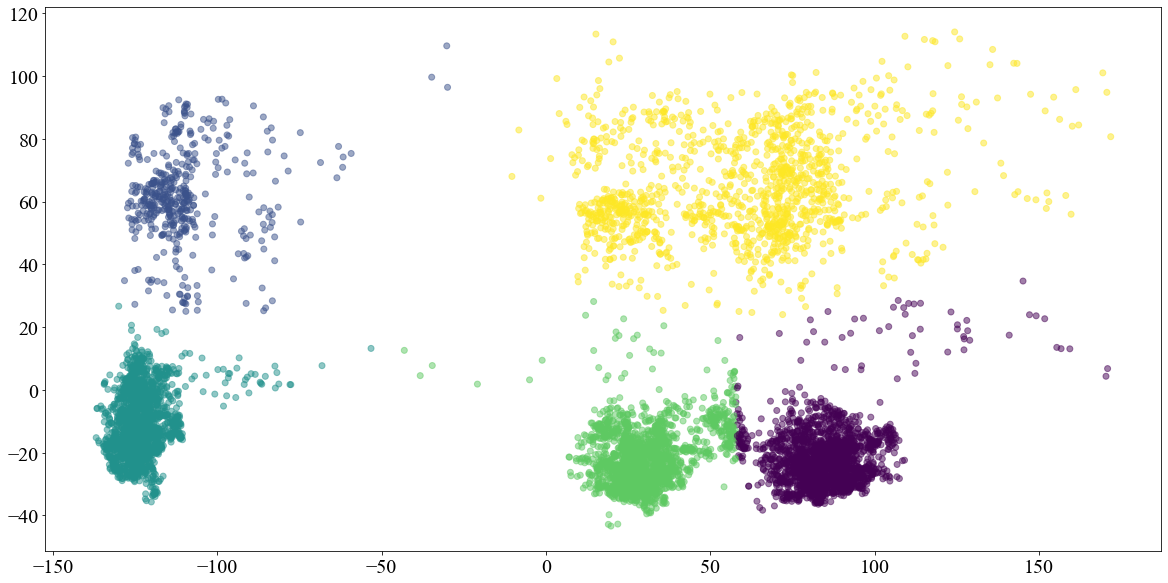

In [290]:
plt.scatter(trans_i_db[:,0], trans_i_db[:,1], c=clustering_i_db.labels_, alpha=0.5)
plt.show()

In [295]:
np.sum(clustering_i_db.labels_ == clustering_i.labels_)

4372

In [296]:
np.sum(clustering_i_db.labels_ != clustering_i.labels_)

3404

In [294]:
clustering_i_db.labels_.shape

(7776,)

In [297]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07","2017-04-08","2017-04-09","2017-04-10","2017-04-11","2017-04-12","2017-04-04","2017-05-05","2017-06-06","2017-07-07","2017-08-08","2017-09-09","2017-10-10","2017-11-11","2017-12-12"]
datelist += pd.date_range(start="2017-03-02", end="2017-03-31").strftime("%Y-%m-%d").astype(str).to_list()
#sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
#sh_u_outliers_all = pd.DataFrame()
#sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [298]:
model = PCA(2)
sh_i_all = sh_i_all.dropna()
trans_i = model.fit_transform(sh_i_all)

In [321]:
clustering_i = KMeans(n_clusters=5, random_state=0).fit(trans_i)

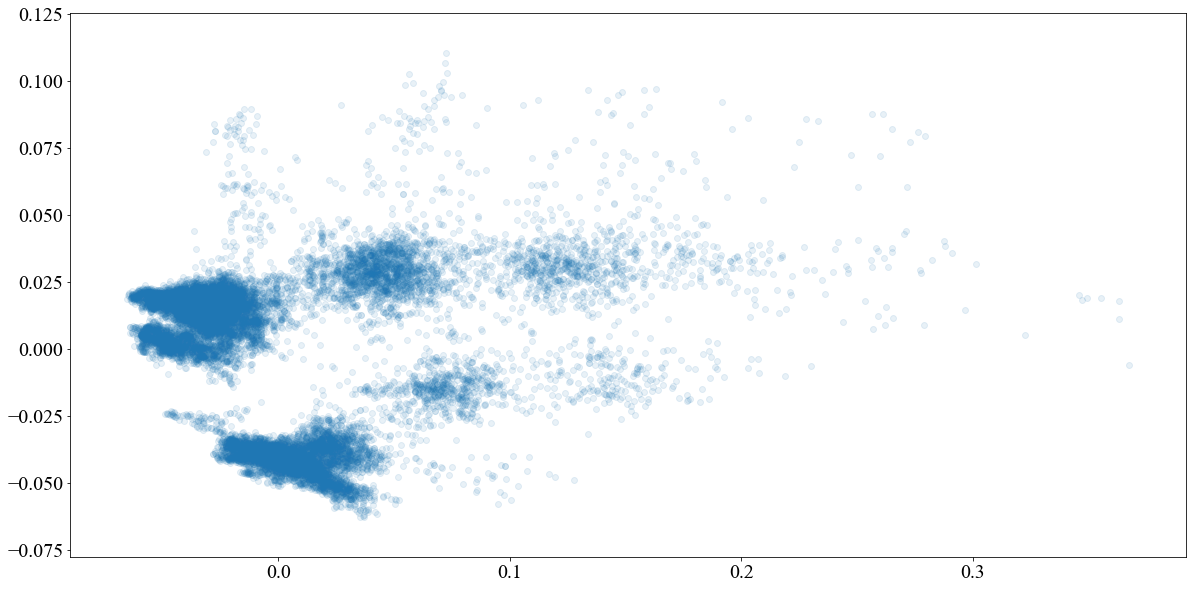

In [303]:
plt.scatter(trans_i[:,0], trans_i[:,1], alpha=0.1)
plt.show()

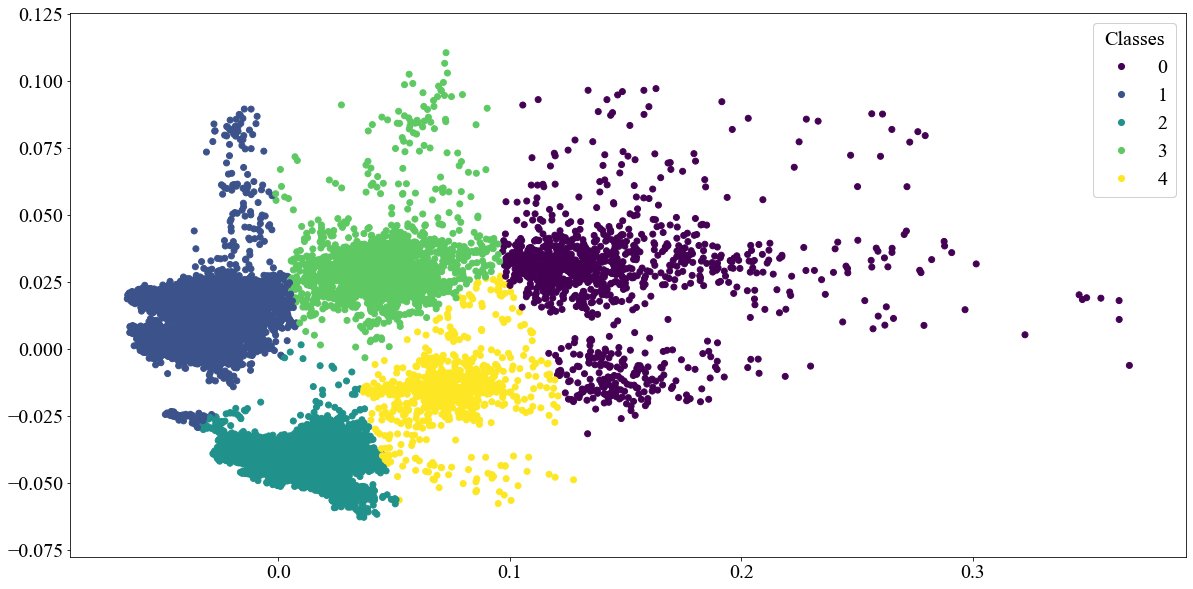

In [348]:
fig, ax = plt.subplots()
scatter = ax.scatter(trans_i[:,0], trans_i[:,1], c=clustering_i.labels_, label=clustering_i.labels_, alpha=1)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.show()

In [335]:
print("Cluster 0: " + str(np.sum(clustering_i.labels_ == 0)/clustering_i.labels_.shape[0]*100) + " %")
print("Cluster 1: " + str(np.sum(clustering_i.labels_ == 1)/clustering_i.labels_.shape[0]*100) + " %")
print("Cluster 2: " + str(np.sum(clustering_i.labels_ == 2)/clustering_i.labels_.shape[0]*100) + " %")
print("Cluster 3: " + str(np.sum(clustering_i.labels_ == 3)/clustering_i.labels_.shape[0]*100) + " %")
print("Cluster 4: " + str(np.sum(clustering_i.labels_ == 4)/clustering_i.labels_.shape[0]*100) + " %")

Cluster 0: 5.598002496878901 %
Cluster 1: 52.24469413233458 %
Cluster 2: 27.7003745318352 %
Cluster 3: 10.421972534332085 %
Cluster 4: 4.034956304619226 %


In [332]:
clustering_i.labels_.shape[0]

20025

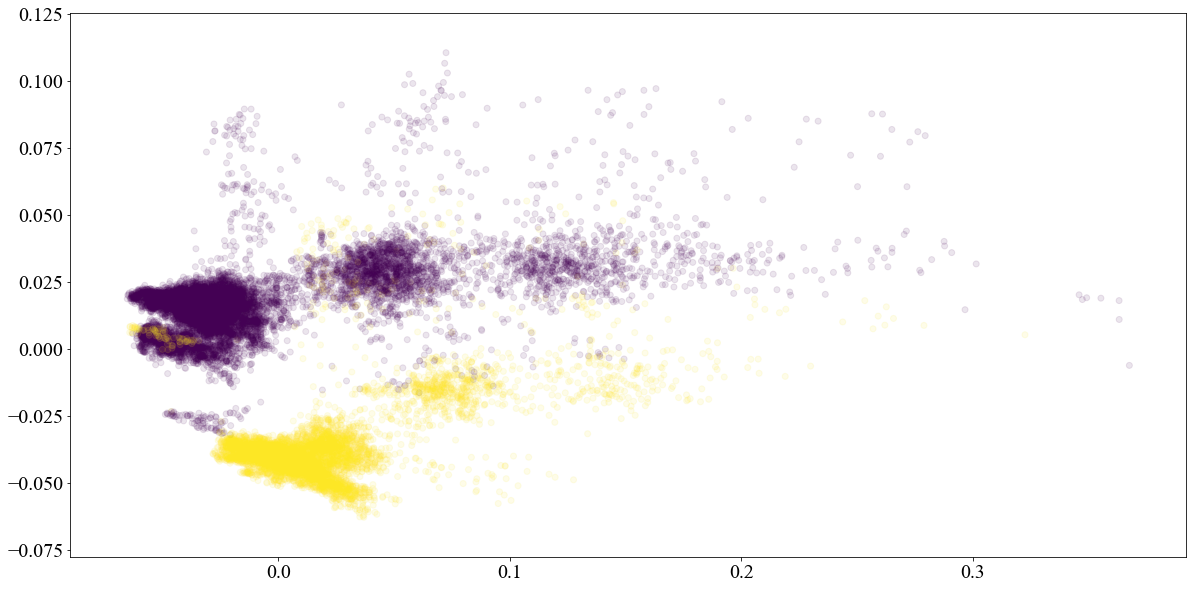

In [317]:
plt.scatter(trans_i[:,0], trans_i[:,1], c=clustering_u.labels_, alpha=0.1)
plt.show()

In [305]:
datelist = ["2017-04-05", "2017-04-06", "2017-04-07","2017-04-08","2017-04-09","2017-04-10","2017-04-11","2017-04-12","2017-04-04","2017-05-05","2017-06-06","2017-07-07","2017-08-08","2017-09-09","2017-10-10","2017-11-11","2017-12-12"]
datelist += pd.date_range(start="2017-03-02", end="2017-03-31").strftime("%Y-%m-%d").astype(str).to_list()

sh_u_all = pd.DataFrame().astype('float32')
#sh_i_all = pd.DataFrame().astype('float32')
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled_phasevise\\u\\" + date + "_harmonics10min_u_mean_p1.p"), ignore_index=True)
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled_phasevise\\u\\" + date + "_harmonics10min_u_mean_p2.p"), ignore_index=True)
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled_phasevise\\u\\" + date + "_harmonics10min_u_mean_p3.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [306]:
model = PCA(2)
sh_u_all = sh_u_all.dropna()
trans_u = model.fit_transform(sh_u_all)

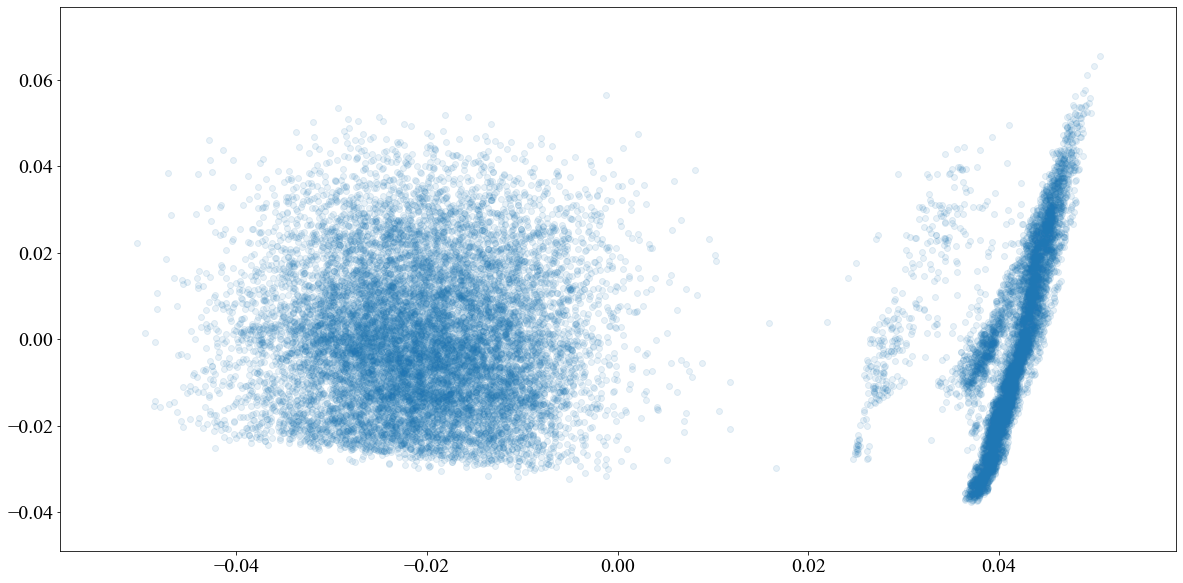

In [308]:
plt.scatter(trans_u[:,0], trans_u[:,1], alpha=0.1)
plt.show()

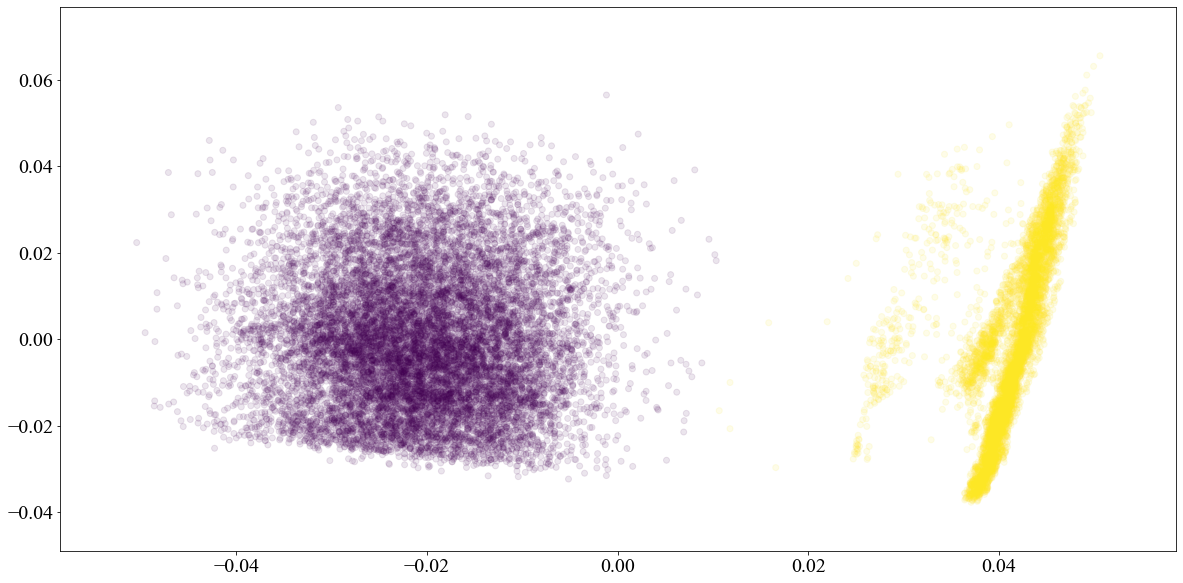

In [313]:
clustering_u = KMeans(n_clusters=2, random_state=0).fit(trans_u)
plt.scatter(trans_u[:,0], trans_u[:,1], c=clustering_u.labels_ , alpha=0.1)
plt.show()

In [315]:
np.sum(clustering_u.labels_ == 0)

13344

In [316]:
np.sum(clustering_u.labels_ == 1)

6681

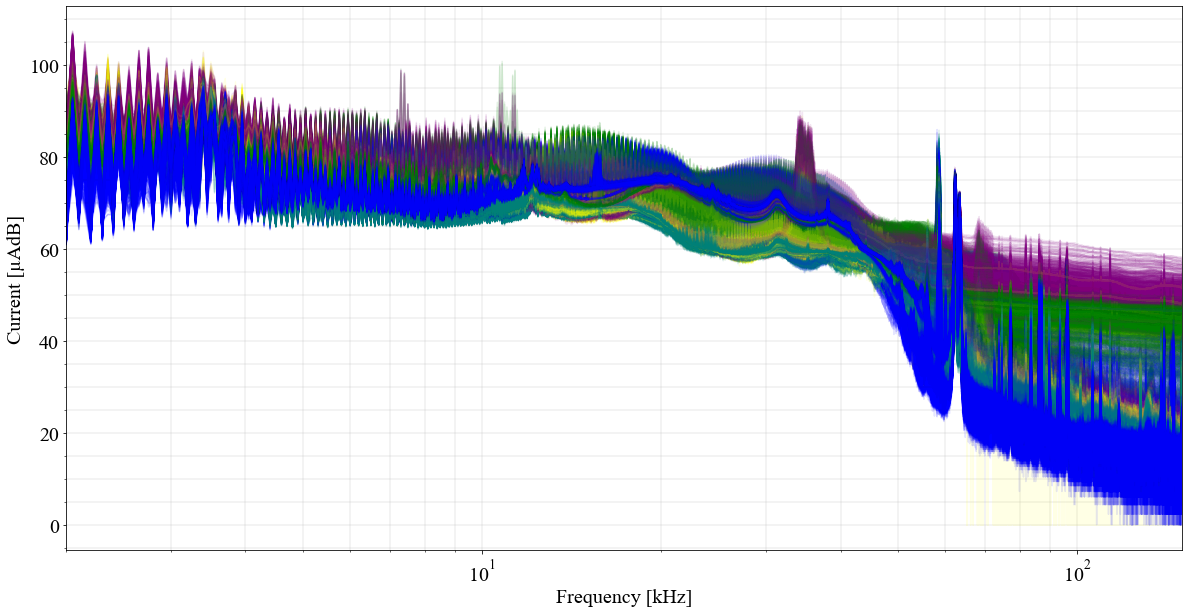

In [349]:
colorList = list()
for i in clustering_i.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('teal')
    if i == 3:
        colorList.append('green')
    if i == 4:
        colorList.append('yellow')
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.01)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

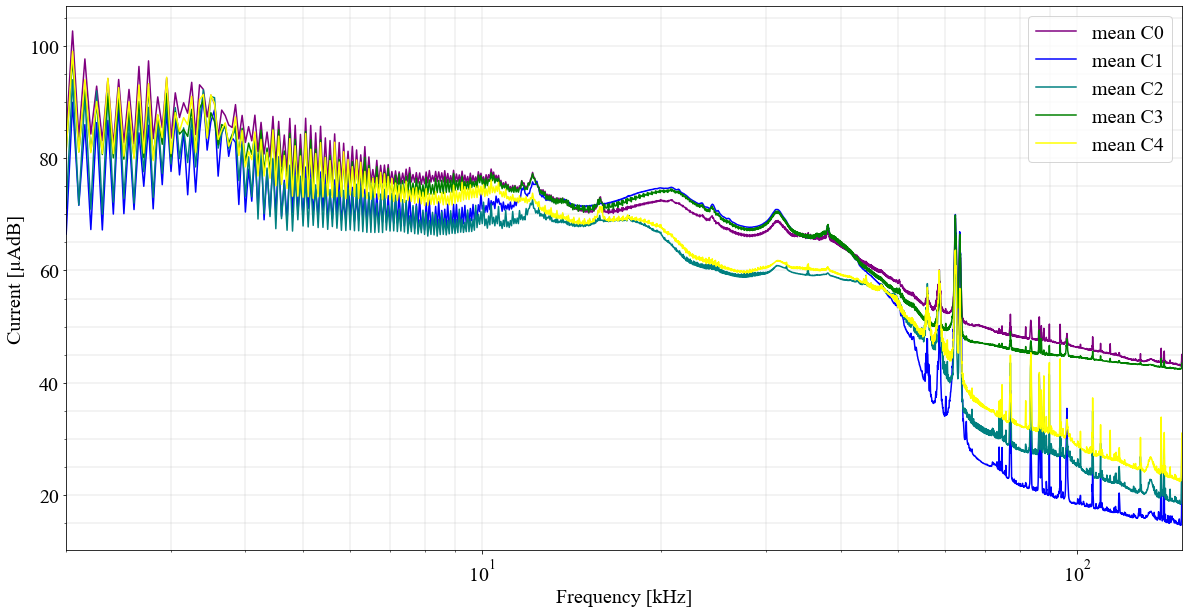

In [350]:
sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()

ax.plot(x, sh_i_db[clustering_i.labels_ == 0].astype('float32').mean(), c='purple', label="mean C0")
ax.plot(x, sh_i_db[clustering_i.labels_ == 1].astype('float32').mean(), c='blue', label="mean C1")
ax.plot(x, sh_i_db[clustering_i.labels_ == 2].astype('float32').mean(), c='teal', label="mean C2")
ax.plot(x, sh_i_db[clustering_i.labels_ == 3].astype('float32').mean(), c='green', label="mean C3")
ax.plot(x, sh_i_db[clustering_i.labels_ == 4].astype('float32').mean(), c='yellow', label="mean C4")



ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')
ax.legend()